In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
churn = pd.read_csv('Churn_Modelling.csv')
churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
churn.describe(exclude='number').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [5]:
#Drop unimportant features
churn.drop(['RowNumber', 'CustomerId','Surname'], axis = 1, inplace = True)
churn.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
# check row duplicates
churn.duplicated().any()

False

In [7]:
churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
listItem = []

for col in churn.columns:
    listItem.append([col, churn[col].dtype,
                     churn[col].isna().sum(),
                     round((churn[col].isna().sum())/len(churn[col])), 
                     churn[col].nunique(), list(churn[col].drop_duplicates().sample(2).values)])

churnDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
churnDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,CreditScore,int64,0,0.0,460,"[834, 575]"
1,Geography,object,0,0.0,3,"[France, Spain]"
2,Gender,object,0,0.0,2,"[Male, Female]"
3,Age,int64,0,0.0,70,"[44, 57]"
4,Tenure,int64,0,0.0,11,"[1, 9]"
5,Balance,float64,0,0.0,6382,"[95128.86, 156123.73]"
6,NumOfProducts,int64,0,0.0,4,"[3, 2]"
7,HasCrCard,int64,0,0.0,2,"[0, 1]"
8,IsActiveMember,int64,0,0.0,2,"[0, 1]"
9,EstimatedSalary,float64,0,0.0,9999,"[121568.37, 40855.79]"


This dataset belongs to the bank that is hidden its name because of data security. The dataset consists of 13 attributes and 10,000 rows. The following shows description of attributes.

1. Customer ID: This attribute is unique and assume that primary key
2. Surname: it belongs to surname of customer and string values
3. Geography: it shows country of customer
4. Gender: male/female
5. Credit Score: it gives credit score of customers. That score calculates interbank system. High score shows that the customer debt high repayment capacity.
6. Age: age of customers
7. Tenure: The number of ages the customer is in the bank.
8. Balance: Customer's money in the bank.
9. Number of Products: Number of products owned by the customer.
10. Credit Card: Whether the customer has a credit card
11. Active Status: Customer's presence in the bank
12. Estimated Salary: Customer's estimated salary
13. Exited: Churn or not

Feature Used:
1. CreditScore (Continuous variable)
2. Geography (Multinomial variable)
3. Gender (Multinomial variable)
4. Age (Multinomial variable)
5. Tenure (Multinomial variable)
6. Balance (Continuous variable)
7. NumOfProducts (Multinomial variable)
8. HasCrCard (Binary variable)
9. IsActiveMember (Binary variable)
10. EstimatedSalary (Continuous variable)
11. Exited (Binary variable) -- TARGET

In [9]:
churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
# sns.set_style('whitegrid')

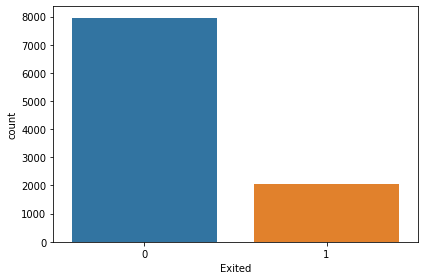

In [11]:
sns.countplot(x = churn['Exited'])
plt.tight_layout()

churned customers from this data are about 20%

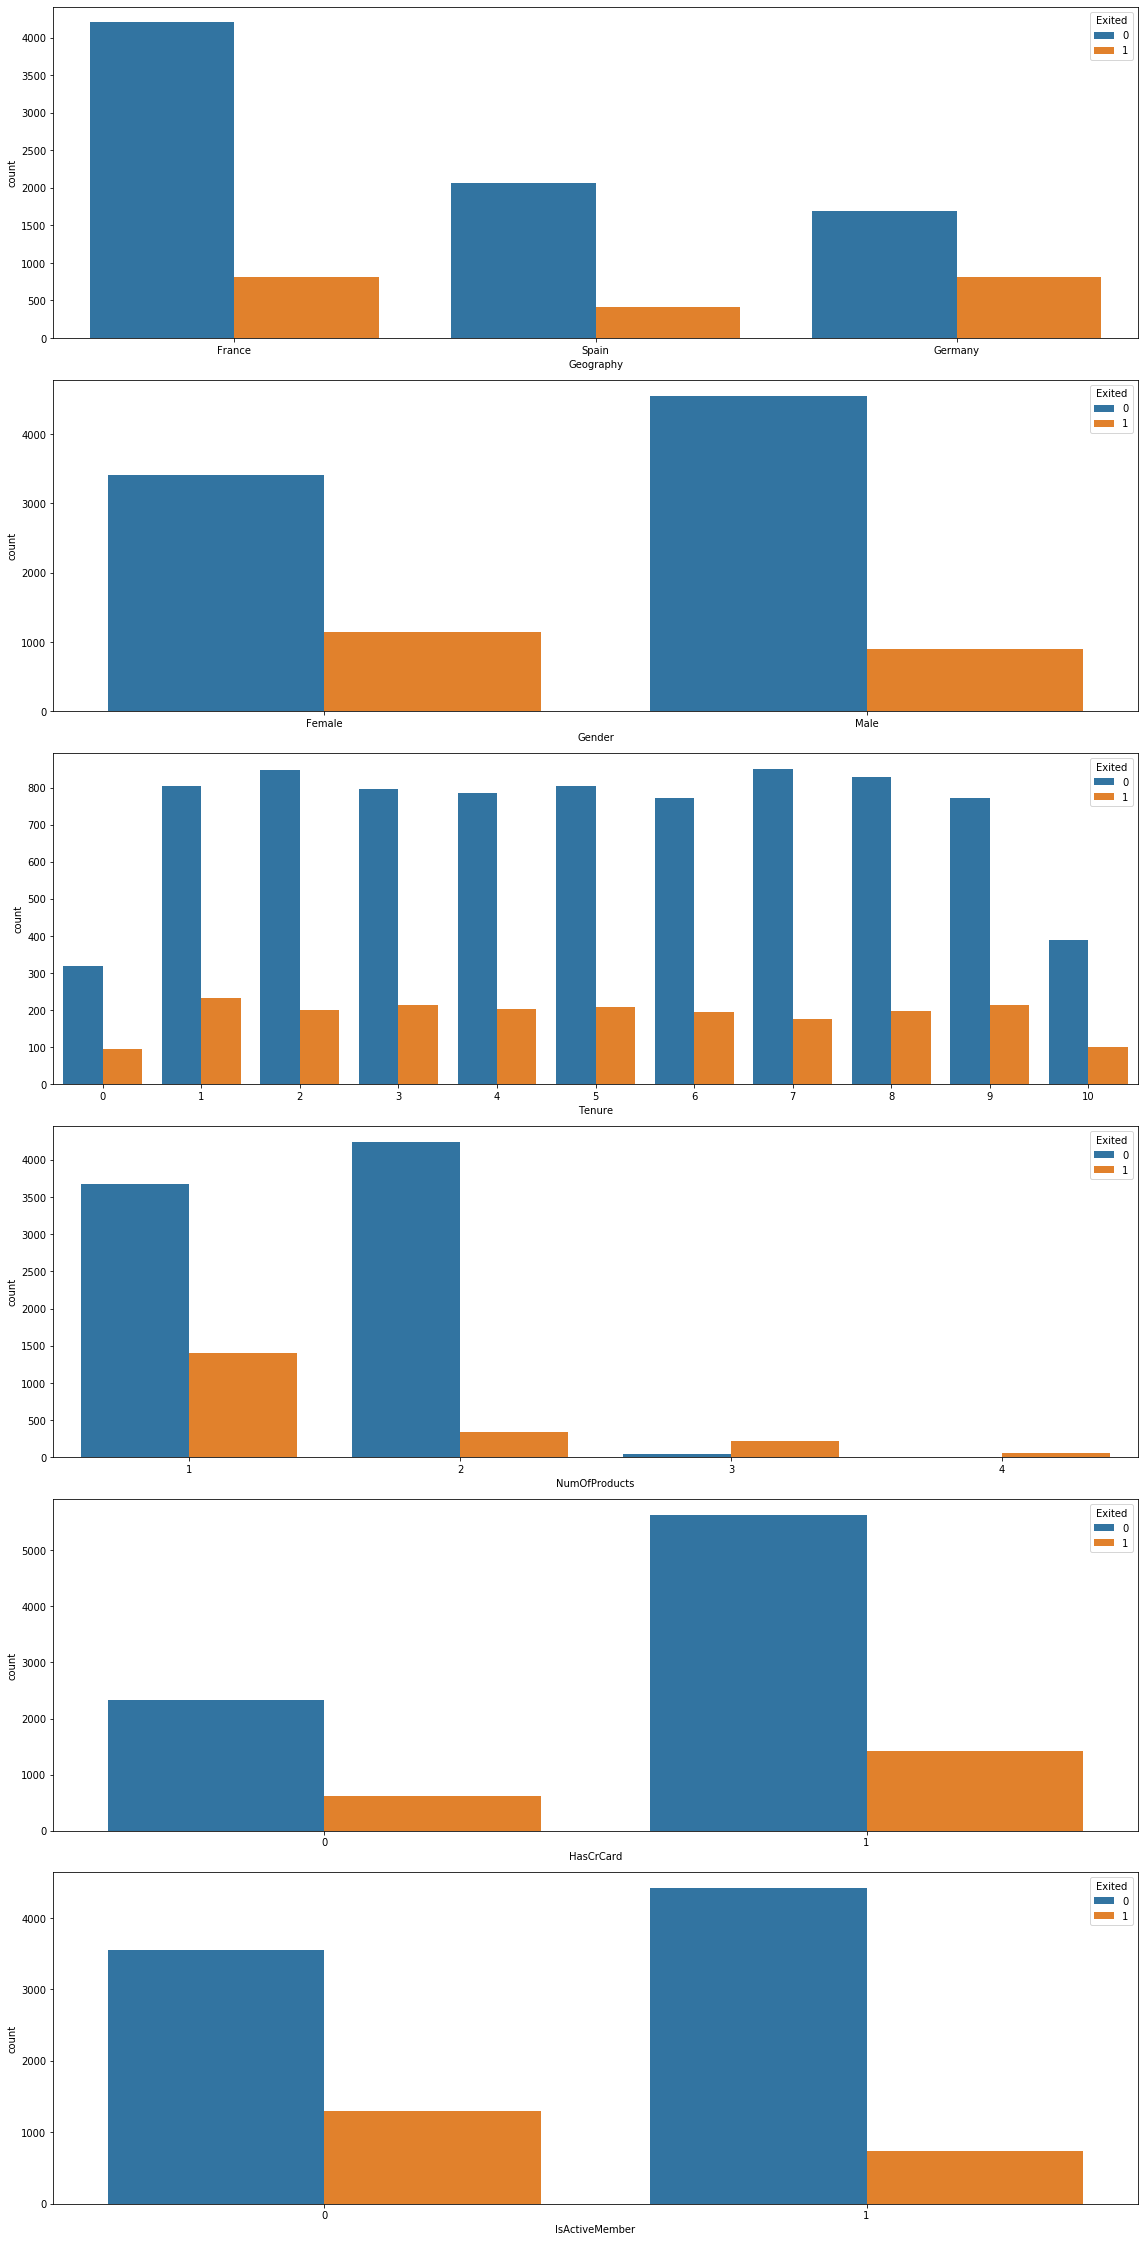

In [12]:
cat_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize = (16,36))
for i in range(len(cat_cols)):
    plt.subplot(len(cat_cols)+1,1,i+1)
    sns.countplot(x = cat_cols[i], hue = 'Exited', data = churn)
plt.tight_layout()    

From the NumOfProducts graph, Customer who has 3 types of products are more likely to churn, and every customer who has 4 types of products are already churned.

In [13]:
churn[churn['NumOfProducts']==4]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1
1701,792,France,Male,50,9,0.00,4,1,1,194700.81,1
1876,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1
2124,704,France,Male,32,7,127785.17,4,0,0,184464.70,1
2196,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1
2285,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1


CreditScore
Correlation Ratio: 0.027093539754657774
Not-Normal Distribution
Skewness: -0.07159586676212397, Kurtosis -0.42611279176518124


Balance
Correlation Ratio: 0.11853276877163375
Not-Normal Distribution
Skewness: -0.14108754375291138, Kurtosis -1.489267106315331


EstimatedSalary

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



Correlation Ratio: 0.012096861026844631
Not-Normal Distribution
Skewness: 0.0020850448448748848, Kurtosis -1.181527710874237


Age
Correlation Ratio: 0.28532303783506796
Not-Normal Distribution
Skewness: 1.0111685586628079, Kurtosis 1.3940495456392599




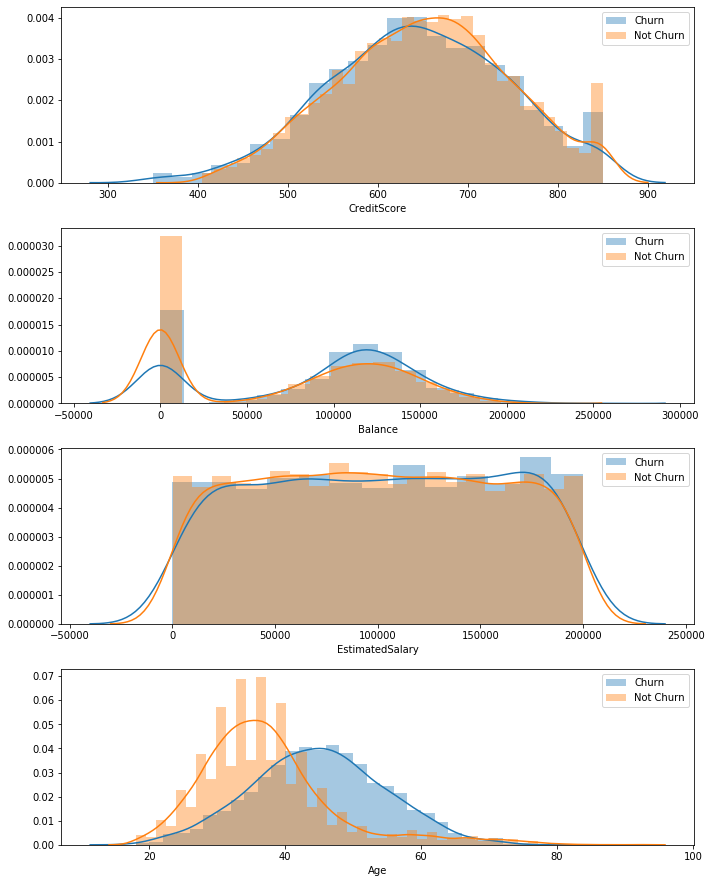

In [16]:
# normality test, skewness, correlation and distplot on numerical feature
import statsmodels
from scipy.stats import shapiro, skew, kurtosis

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

num_cols = ['CreditScore','Balance','EstimatedSalary','Age']

plt.figure(figsize = (10,15))

for i in range(len(num_cols)):
    print(num_cols[i])
    print('Correlation Ratio: {}'.format(correlation_ratio(churn['Exited'], churn[num_cols[i]])))
    if shapiro(churn[num_cols[i]])[1] < 0.05:
        print('Not-Normal Distribution')
    else:
        print('Normal Distribution')
        
    print('Skewness: {}, Kurtosis {}'.format(skew(churn[num_cols[i]]), kurtosis(churn[num_cols[i]])))
    print('\n')
    
    plt.subplot(len(num_cols)+1,1,i+1)
    sns.distplot(churn[churn['Exited'] == 1][num_cols[i]], label = 'Churn')
    sns.distplot(churn[churn['Exited'] == 0][num_cols[i]], label = 'Not Churn')
    plt.legend()
    
plt.tight_layout()

as seen on the graphs above, the distribution of churn and not churn customers are more or less the same.

## Hypothesis Testing

In [14]:
# cramers_v correlation on multinomial features

In [15]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# categorical_columns = churn.select_dtypes('object').columns
categorical_columns = cat_cols

import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramers.append(cramers_v(churn['Exited'], churn[i]))

res = pd.DataFrame(data = [categorical_columns, cramers] 
             ).T 
res.columns = ['Column', 'Cramers_V']
res.sort_values(by = 'Cramers_V', ascending = False)

,Column,Cramers_V
3,NumOfProducts,0.387399
0,Geography,0.172999
5,IsActiveMember,0.155567
1,Gender,0.105797
2,Tenure,0.0197478
4,HasCrCard,0


In [17]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(churn['Exited'], churn[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')

In [18]:
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
res

,Column,Hypothesis
0,Geography,Reject Null Hypothesis
1,Gender,Reject Null Hypothesis
2,Tenure,Fail to Reject Null Hypothesis
3,NumOfProducts,Reject Null Hypothesis
4,HasCrCard,Fail to Reject Null Hypothesis
5,IsActiveMember,Reject Null Hypothesis


In [19]:
check = {}
for i in res['Column']:
    dummies = pd.get_dummies(churn[i])
    bon_p_value = 0.05/churn[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(churn['Exited'], dummies[series]))[1] < bon_p_value:
            check['{}+{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}+{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
        

In [20]:
res_chi = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi.columns = ['Pair', 'Hypothesis']
res_chi

,Pair,Hypothesis
0,Geography+France,Reject Null Hypothesis
1,Geography+Germany,Reject Null Hypothesis
2,Geography+Spain,Reject Null Hypothesis
3,Gender+Female,Reject Null Hypothesis
4,Gender+Male,Reject Null Hypothesis
5,Tenure+0,Fail to Reject Null Hypothesis
6,Tenure+1,Fail to Reject Null Hypothesis
7,Tenure+2,Fail to Reject Null Hypothesis
8,Tenure+3,Fail to Reject Null Hypothesis
9,Tenure+4,Fail to Reject Null Hypothesis


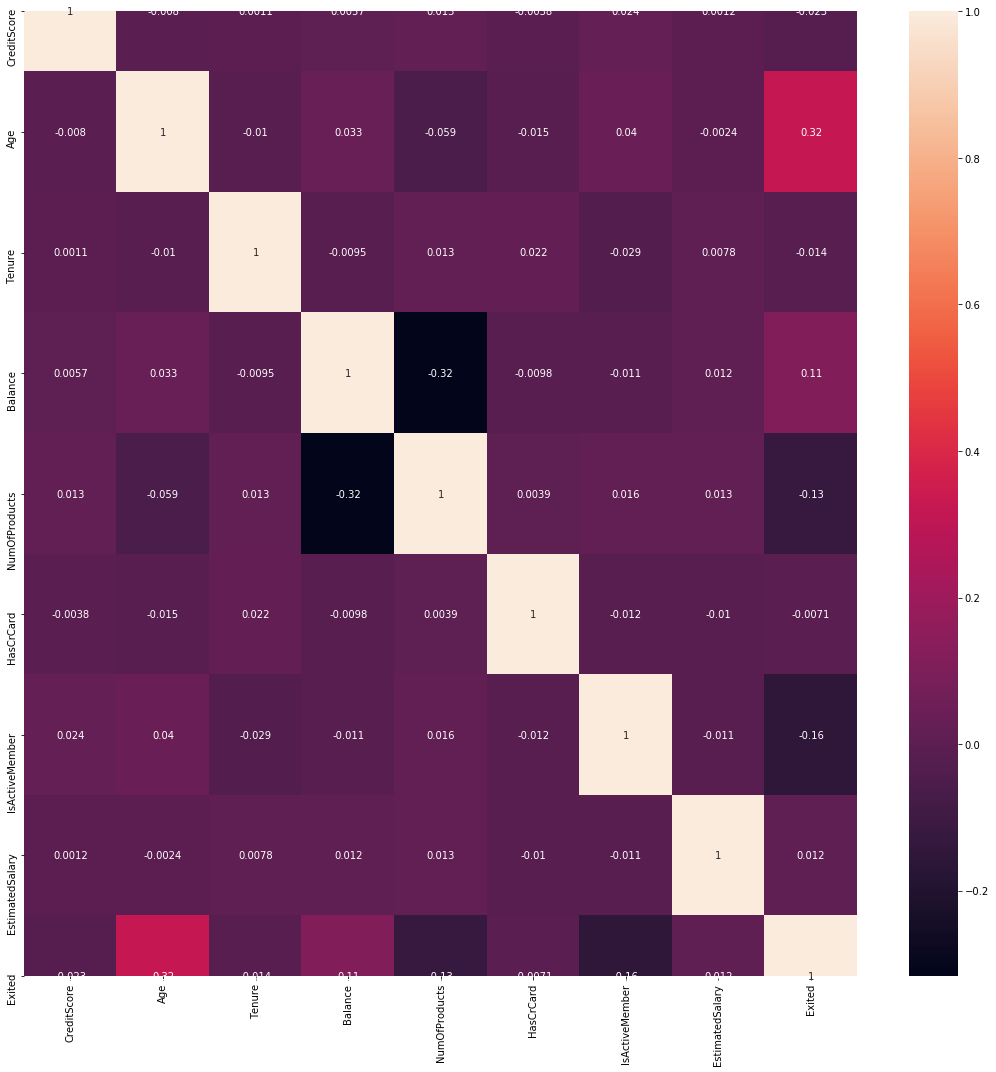

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(churn.corr(method='spearman'), annot=True)
plt.tight_layout()

## Scaled

In [23]:
# dummies for categorical columns
churn_dummy = pd.get_dummies(churn, columns = ['Geography', 'Gender'], drop_first = True)
target = churn['Exited']
churn_dummy.drop(['Exited'], axis = 1, inplace = True)
churn_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


## Train Test Split

Normal data

In [24]:
# split into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(churn_dummy, target, test_size = 0.3, random_state=101) 

In [25]:
# For Dash Purposes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# smote =SMOTE(sampling_strategy = 'minority')
# OS_trainX, OS_trainY = smote.fit_sample(X_train, y_train)

# pipe_xgb = Pipeline([('std_scl', StandardScaler()), 
#                      ('xgb', XGBClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4))])
# pipe_xgb.fit(OS_trainX, OS_trainY)


Using TensorFlow backend.
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [26]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) 

SMOTE Oversampling

In [27]:
from imblearn.over_sampling import SMOTE

smote =SMOTE(sampling_strategy = 'minority')
oversampled_trainX, oversampled_trainY = smote.fit_sample(X_train, y_train)

## Machine Learning Models

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import  roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss
from sklearn.ensemble import GradientBoostingClassifier

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg_OS = LogisticRegression()

In [30]:
logreg.fit(X_train, y_train)

logreg_OS.fit(oversampled_trainX, oversampled_trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
logreg_pred = logreg.predict(X_train)
logreg_pred_OS = logreg_OS.predict(oversampled_trainX)

logreg_pred_test = logreg.predict(X_test)
logreg_pred_OS_test = logreg_OS.predict(X_test)

In [32]:
print('---------LOGISTIC REGRESSION CLASSIFICATION REPORT---------')
print('--------------------Original Train Data--------------------')
print(classification_report(y_train, logreg_pred))

print('\n-------------------Oversampled Train Data------------------')
print(classification_report(oversampled_trainY, logreg_pred_OS))


print('\n--------------------Original Test Data--------------------')
print(classification_report(y_test, logreg_pred_test))

print('\n-------------------Oversampled Test Data------------------')
print(classification_report(y_test, logreg_pred_OS_test))

---------LOGISTIC REGRESSION CLASSIFICATION REPORT---------
--------------------Original Train Data--------------------
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5585
           1       0.62      0.21      0.31      1415

    accuracy                           0.81      7000
   macro avg       0.72      0.59      0.60      7000
weighted avg       0.79      0.81      0.77      7000


-------------------Oversampled Train Data------------------
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      5585
           1       0.71      0.69      0.70      5585

    accuracy                           0.70     11170
   macro avg       0.70      0.70      0.70     11170
weighted avg       0.70      0.70      0.70     11170


--------------------Original Test Data--------------------
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2

## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree_OS = DecisionTreeClassifier()

In [34]:
dtree.fit(X_train, y_train)

dtree_OS.fit(oversampled_trainX, oversampled_trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
dtree_pred = dtree.predict(X_train)
dtree_pred_OS = dtree_OS.predict(oversampled_trainX)

dtree_pred_test = dtree.predict(X_test)
dtree_pred_OS_test = dtree_OS.predict(X_test)

In [36]:
print('----------DECISION TREE CLASSIFICATION REPORT--------------')
print('--------------------Original Train Data--------------------')
print(classification_report(y_train, dtree_pred))

print('\n-------------------Oversampled Train Data------------------')
print(classification_report(oversampled_trainY, dtree_pred_OS))


print('\n--------------------Original Test Data--------------------')
print(classification_report(y_test, dtree_pred_test))

print('\n-------------------Oversampled Test Data------------------')
print(classification_report(y_test, dtree_pred_OS_test))

----------DECISION TREE CLASSIFICATION REPORT--------------
--------------------Original Train Data--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5585
           1       1.00      1.00      1.00      1415

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000


-------------------Oversampled Train Data------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5585
           1       1.00      1.00      1.00      5585

    accuracy                           1.00     11170
   macro avg       1.00      1.00      1.00     11170
weighted avg       1.00      1.00      1.00     11170


--------------------Original Test Data--------------------
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2

##  Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_OS = RandomForestClassifier()

In [38]:
rfc.fit(X_train, y_train)

rfc_OS.fit(oversampled_trainX, oversampled_trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
rfc_pred = rfc.predict(X_train)
rfc_pred_OS = rfc_OS.predict(oversampled_trainX)

rfc_pred_test = rfc.predict(X_test)
rfc_pred_OS_test = rfc_OS.predict(X_test)

In [40]:
print('----------RANDOM FOREST CLASSIFICATION REPORT--------------')
print('--------------------Original Train Data--------------------')
print(classification_report(y_train, rfc_pred))

print('\n-------------------Oversampled Train Data------------------')
print(classification_report(oversampled_trainY, rfc_pred_OS))


print('\n--------------------Original Test Data--------------------')
print(classification_report(y_test, rfc_pred_test))

print('\n-------------------Oversampled Test Data------------------')
print(classification_report(y_test, rfc_pred_OS_test))

----------RANDOM FOREST CLASSIFICATION REPORT--------------
--------------------Original Train Data--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5585
           1       1.00      1.00      1.00      1415

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000


-------------------Oversampled Train Data------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5585
           1       1.00      1.00      1.00      5585

    accuracy                           1.00     11170
   macro avg       1.00      1.00      1.00     11170
weighted avg       1.00      1.00      1.00     11170


--------------------Original Test Data--------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2

In [41]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4)
xgboost_OS = XGBClassifier(learning_rate = 0.01, n_estimators = 1000, max_depth = 4)

In [42]:
xgboost.fit(X_train, y_train)

xgboost_OS.fit(oversampled_trainX, oversampled_trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
xgboost_pred = xgboost.predict(X_train)
xgboost_pred_OS = xgboost_OS.predict(oversampled_trainX)

xgboost_pred_test = xgboost.predict(X_test)
xgboost_pred_OS_test = xgboost_OS.predict(X_test)

In [44]:
print('--------------XGBOOST CLASSIFICATION REPORT----------------')
print('--------------------Original Train Data--------------------')
print(classification_report(y_train, logreg_pred))

print('\n-------------------Oversampled Train Data------------------')
print(classification_report(oversampled_trainY, xgboost_pred_OS))


print('\n--------------------Original Test Data--------------------')
print(classification_report(y_test, xgboost_pred_test))

print('\n-------------------Oversampled Test Data------------------')
print(classification_report(y_test, xgboost_pred_OS_test))

--------------XGBOOST CLASSIFICATION REPORT----------------
--------------------Original Train Data--------------------
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5585
           1       0.62      0.21      0.31      1415

    accuracy                           0.81      7000
   macro avg       0.72      0.59      0.60      7000
weighted avg       0.79      0.81      0.77      7000


-------------------Oversampled Train Data------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5585
           1       0.92      0.88      0.90      5585

    accuracy                           0.90     11170
   macro avg       0.90      0.90      0.90     11170
weighted avg       0.90      0.90      0.90     11170


--------------------Original Test Data--------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2

## Tuning Model

In [45]:
xgboost_predprob = xgboost.predict_proba(X_train)
preds = xgboost_predprob[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

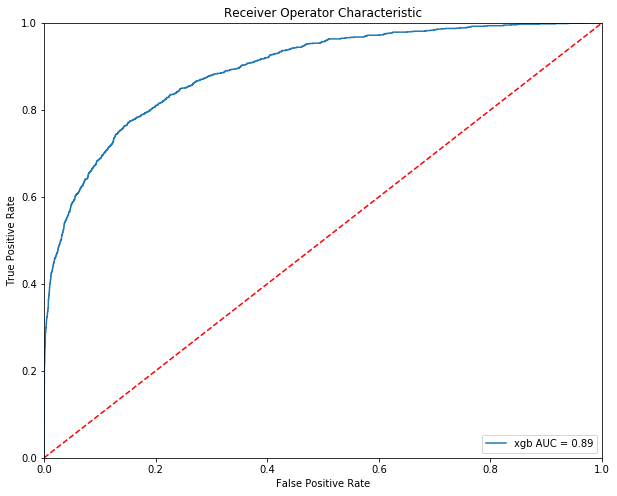

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr,  label = 'xgb AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score

Cross validation - Normal Data scores: [0.86273614 0.85540923 0.84812038 0.86461386 0.86236821 0.87818668
 0.84495684 0.85712302 0.86819123 0.84951285]


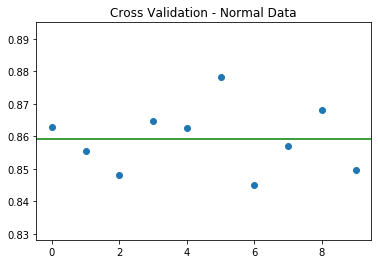

In [48]:
xgboost_scores = cross_val_score(estimator=xgboost,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=1,
                        scoring = 'roc_auc')

print('Cross validation - Normal Data scores: {}'.format(xgboost_scores))
plt.title('Cross Validation - Normal Data')
plt.scatter(np.arange(len(xgboost_scores)), xgboost_scores)
plt.axhline(y=np.mean(xgboost_scores), color='g')
plt.show()

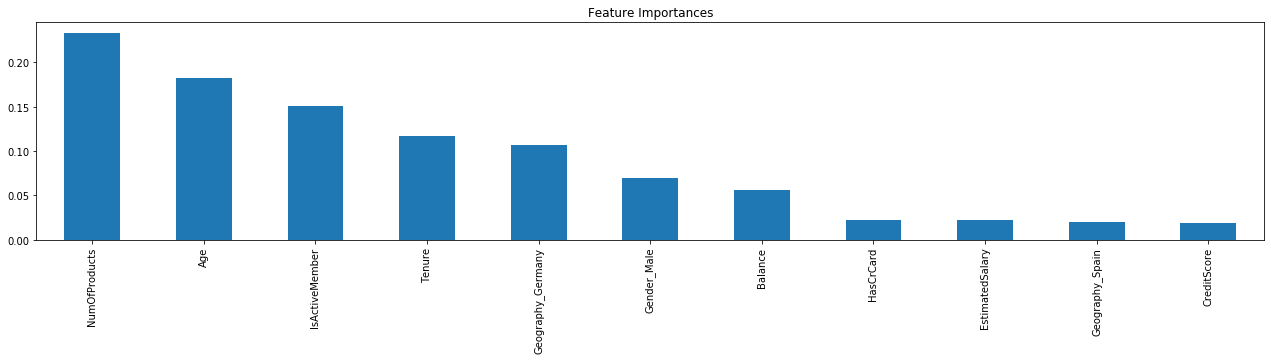

In [49]:
plt.figure(figsize=(22,4))
coef1 = pd.Series(xgboost_OS.feature_importances_, churn_dummy.columns).sort_values(ascending= False)
coef1.plot(kind = 'bar', title='Feature Importances')

In [50]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [51]:
perm = PermutationImportance(xgboost_OS, scoring = 'roc_auc', random_state= 101).fit(oversampled_trainX, oversampled_trainY)
show_weights(perm, feature_names = list(churn_dummy.columns))

Weight,Feature
0.0825 ± 0.0053,NumOfProducts
0.0782 ± 0.0061,Age
0.0756 ± 0.0034,Tenure
0.0213 ± 0.0012,IsActiveMember
0.0118 ± 0.0018,Balance
0.0074 ± 0.0008,Geography_Germany
0.0066 ± 0.0005,Gender_Male
0.0037 ± 0.0004,EstimatedSalary
0.0032 ± 0.0005,CreditScore
0.0005 ± 0.0001,Geography_Spain


train_scores:

[[0.87933333 0.88288889 0.87644444 0.88066667 0.88155556 0.88355556
  0.88355556 0.88355556 0.88355556 0.88355556]
 [0.87555556 0.87733333 0.87413333 0.87804444 0.87822222 0.88142222
  0.87573333 0.87573333 0.87573333 0.87573333]
 [0.87822222 0.8802963  0.87392593 0.87822222 0.88014815 0.88148148
  0.87837037 0.87496296 0.87496296 0.87496296]
 [0.87733333 0.8792381  0.87479365 0.87542857 0.87746032 0.87936508
  0.87580952 0.8744127  0.87707937 0.87707937]
 [0.87655556 0.87777778 0.87644444 0.87611111 0.87677778 0.88
  0.87722222 0.87433333 0.87733333 0.878     ]]
test_scores:

[[0.867 0.854 0.873 0.856 0.862 0.849 0.856 0.87  0.856 0.856]
 [0.869 0.861 0.868 0.864 0.864 0.852 0.864 0.88  0.856 0.859]
 [0.864 0.863 0.876 0.866 0.867 0.85  0.864 0.877 0.856 0.861]
 [0.864 0.864 0.876 0.863 0.867 0.853 0.863 0.874 0.856 0.862]
 [0.873 0.862 0.876 0.867 0.865 0.852 0.863 0.876 0.854 0.861]]
[0.88186667 0.87676444 0.87755556 0.8768     0.87705556]
[4500 5625 6750 7875 9000]


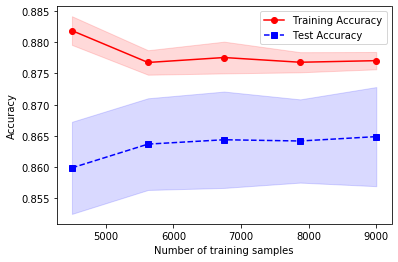

In [52]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=xgboost,
                                                       X=churn_dummy,
                                                       y=target,
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)

print('train_scores:\n')
print(train_scores)
print('test_scores:\n')
print(test_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

since test size 0.2 -0.4 have the closest training and test accuracy, the test size 0.3 is remained unchanged.

## Grid Search

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
xgboost_OS_search = GridSearchCV(xgboost_OS,
                    param_grid = {
                        'n_estimators':[100, 300, 500, 800, 1000],
                        'max_depth': [4, 6, 8],
                        'learning_rate': [0.01,0.05,0.10,0.50]},
                    scoring = 'recall',
                    cv = 5, n_jobs = -1)

In [55]:
xgboost_OS_search.fit(oversampled_trainX, oversampled_trainY)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=4, min_child_weight=1,
                                     missing=None, n_estimators=1000, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 300, 500, 800, 

In [56]:
xgboost_OS_search.best_params_

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300}

In [57]:
xgboost_OS_search.best_score_

0.855863921217547

In [58]:
print(classification_report(y_test, xgboost_OS_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2378
           1       0.69      0.58      0.63       622

    accuracy                           0.86      3000
   macro avg       0.79      0.75      0.77      3000
weighted avg       0.85      0.86      0.85      3000



In [83]:
churn_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [5]:
# def set_display_children(CS, Age, Tenure, Balance, npr, CC, Act, Salary, Geo, Gen):
#     file = []
#     file.append(CS)
#     file.append(Age)
#     file.append(Tenure)
#     file.append(Balance)
#     file.append(npr)
#     file.append(CC)
#     file.append(Act)
#     file.append(Salary)
#     if Geo == 'Germany':
#         file.append(1)
#         file.append(0)
#     elif Geo == 'France':
#         file.append(0)
#         file.append(0)
#     elif Geo == 'Spain':
#         file.append(0)
#         file.append(1)
#     if Gen == 'Male':
#         file.append(1)
#     else:
#         file.append(0)
#     file1 = np.array(file)
#     print(file1)
#     loadModel = pickle.load(open('bank_customer_pipe_xgb.sav', 'rb'))
#     result = loadModel.predict(file1.reshape(1,11))
#     res = []
#     for i in result:
#         if i == 1:
#             res.append('Churning Customer')
#         else:
#             res.append('Not Churning Customer')
#     return 'This is a {}'.format(res[0])
# set_display_children(CS, Age, Tenure, Balance, npr, CC, Act, Salary, Geo, Gen)

In [6]:
# set_display_children(709, 36, 7, 0, 1, 0, 1, 42085, 'France', 'Female')

[  709    36     7     0     1     0     1 42085     0     0     0]


'This is a Churning Customer'

In [4]:
# import pickle


# # save model
# filename = 'bank_customer_pipe_xgb.sav';
# pickle.dump(pipe_xgb, open(filename, 'wb'))

In [26]:
# loadModel = pickle.load(open('bank_customer_pipe_xgb.sav', 'rb'))
# loadModel.steps

[('std_scl', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.01, max_delta_step=0, max_depth=4,
                min_child_weight=1, missing=nan, n_estimators=1000, n_jobs=1,
                nthread=None, objective='binary:logistic', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                silent=None, subsample=1, verbosity=1))]